In [1]:
library(pacman)

pacman::p_load(ggplot2, ggthemes, lubridate, dplyr, tidyr, DT, scales)

In [2]:
knitr::opts_chunk$set(echo=TRUE)
library(ggplot2)

In [3]:
color = c("#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0")  

In [4]:
apr_data <- read.csv("data/uber-raw-data-apr14.csv")
may_data <- read.csv("data/uber-raw-data-may14.csv")
jun_data <- read.csv("data/uber-raw-data-jun14.csv")
jul_data <- read.csv("data/uber-raw-data-jul14.csv")
aug_data <- read.csv("data/uber-raw-data-aug14.csv")
sep_data <- read.csv("data/uber-raw-data-sep14.csv")

# MODIFYING DATASETS

In [ ]:
data_2014  <-  rbind(apr_data, may_data, jun_data, jul_data, aug_data, sep_data)

In [8]:
head(data_2014)

,Date.Time,Lat,Lon,Base
,<chr>,<dbl>,<dbl>,<chr>
1,4/1/2014 0:11:00,40.7690,-73.9549,B02512
2,4/1/2014 0:17:00,40.7267,-74.0345,B02512
3,4/1/2014 0:21:00,40.7316,-73.9873,B02512
4,4/1/2014 0:28:00,40.7588,-73.9776,B02512
5,4/1/2014 0:33:00,40.7594,-73.9722,B02512
6,4/1/2014 0:33:00,40.7383,-74.0403,B02512


In [9]:
data_2014$Date.Time  <- as.POSIXct(data_2014$Date.Time, format="%m/%d/%Y %H:%M:%S")
head(data_2014)

,Date.Time,Lat,Lon,Base
,<dttm>,<dbl>,<dbl>,<chr>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512


In [10]:
data_2014$Time  <- format(as.POSIXct(data_2014$Date.Time, format="%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
head(data_2014)

,Date.Time,Lat,Lon,Base,Time
,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00


In [12]:
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)
head(data_2014)

,Date.Time,Lat,Lon,Base,Time
,<dttm>,<dbl>,<dbl>,<chr>,<chr>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00


In [13]:
data_2014$day  <- factor(day(data_2014$Date.Time))
data_2014$month  <- factor(month(data_2014$Date.Time, label=TRUE))
data_2014$year  <- factor(year(data_2014$Date.Time))
data_2014$dayfoweek <- factor(wday(data_2014$Date.Time, label=TRUE))
head(data_2014)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayfoweek
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,kwi,2014,wt\.
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,kwi,2014,wt\.
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,kwi,2014,wt\.
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,kwi,2014,wt\.
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,kwi,2014,wt\.
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,kwi,2014,wt\.


In [14]:
data_2014$hour  <- factor(hour(hms(data_2014$Time)))
data_2014$minute  <-factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))
head(data_2014)

,Date.Time,Lat,Lon,Base,Time,day,month,year,dayfoweek,hour,minute,second
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<ord>,<fct>,<ord>,<fct>,<fct>,<fct>
1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,kwi,2014,wt\.,0,11,0
2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,kwi,2014,wt\.,0,17,0
3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,kwi,2014,wt\.,0,21,0
4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,kwi,2014,wt\.,0,28,0
5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,kwi,2014,wt\.,0,33,0
6,2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,1,kwi,2014,wt\.,0,33,0


# PLOT THE TRIPS BY THE OURS IN A DAY
It's noticeable that the number of trips is higher in the evening around 5:00 and 6:00 PM.

In [16]:
hour_data <- data_2014 %>%
    group_by(hour) %>%
        dplyr::summarize(Total = n())
head(hour_data)

`summarise()` ungrouping output (override with `.groups` argument)



hour,Total
<fct>,<int>
0,103836
1,67227
2,45865
3,48287
4,55230
5,83939


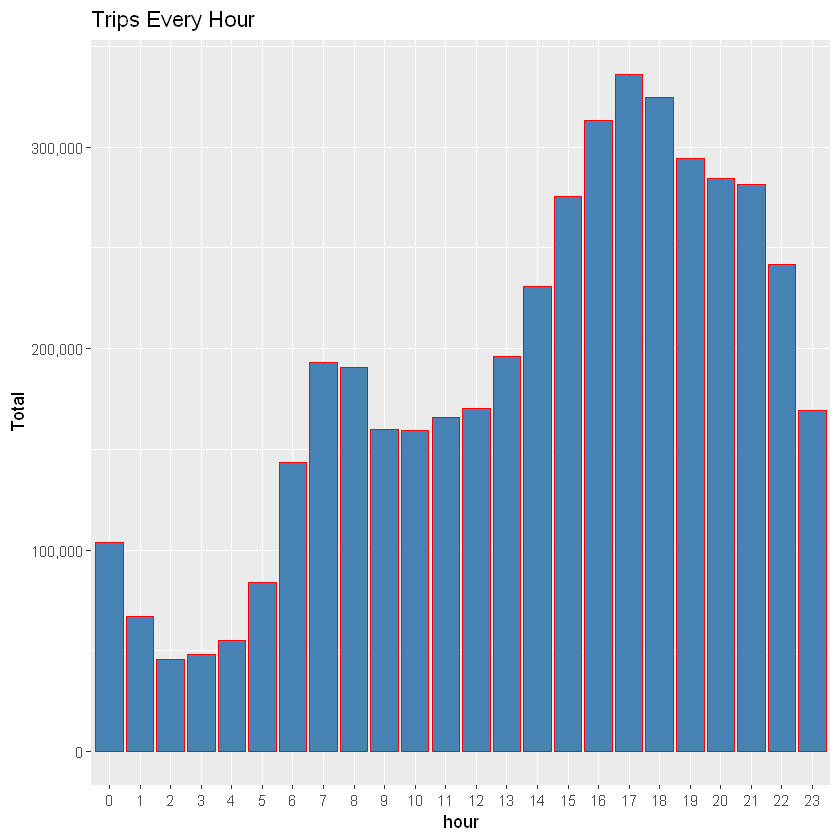

In [17]:
ggplot(hour_data, aes(hour, Total)) +
    geom_bar(stat = "identity", fill = "steelblue", color = "red") +
        ggtitle("Trips Every Hour") + theme(legend.position = "none") + scale_y_continuous(labels = comma)

In [19]:
month_hour  <- data_2014 %>%
    group_by(month, hour) %>%
        dplyr::summarize(Total = n())

`summarise()` regrouping output by 'month' (override with `.groups` argument)



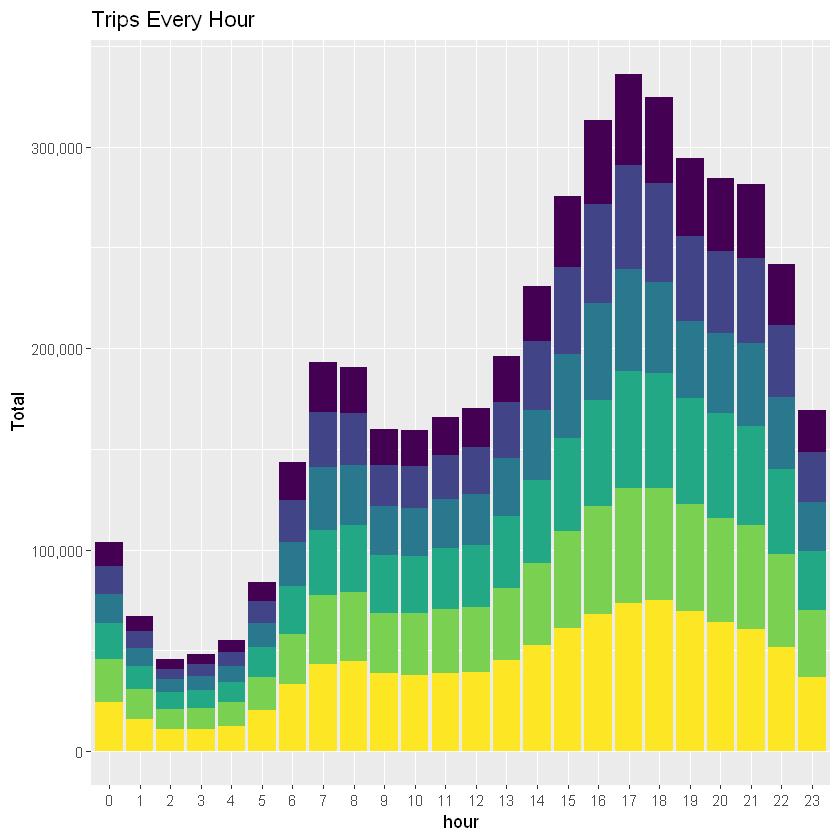

In [22]:
ggplot(month_hour, aes(hour, Total, fill=month)) + geom_bar(stat="identity") +
    ggtitle("Trips Every Hour") + theme(legend.position = "none") +
        scale_y_continuous(labels = comma)

# PLOT DATA BY TRIPS DURING EVERY DAY OF THE MONTH
It's noticeable that 30th of the month has the highest trips in the year which is mostly contributed by the month of April.

In [26]:
day_group <- data_2014 %>%
    group_by(day) %>%
        dplyr::summarize(Total = n())
head(day_group)

`summarise()` ungrouping output (override with `.groups` argument)



day,Total
<fct>,<int>
1,127430
2,143201
3,142983
4,140923
5,147054
6,139886


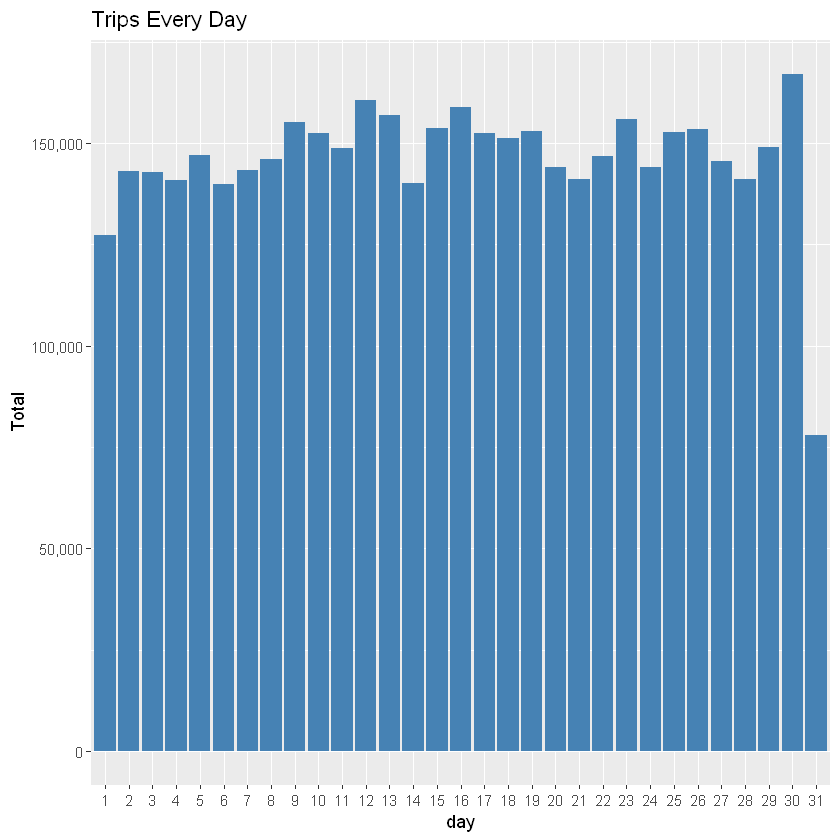

In [37]:
ggplot(day_group, aes(day, Total)) + geom_bar(stat = "identity", fill="steelblue") +
    ggtitle("Trips Every Day") + theme(legend.position = "none") +
        scale_y_continuous(labels = comma)

In [43]:
day_month_group <- data_2014 %>%
    group_by(month, day) %>%
        dplyr::summarize(Total = n())

`summarise()` regrouping output by 'month' (override with `.groups` argument)



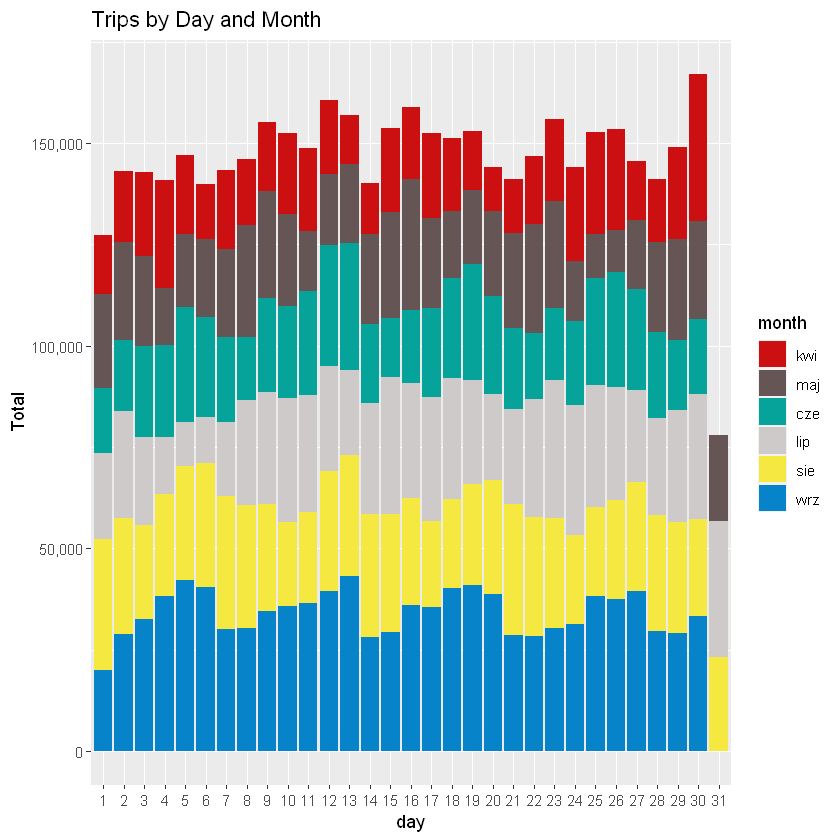

In [42]:
ggplot(day_month_group, aes(day, Total, fill = month)) + geom_bar(stat = "identity") +
    ggtitle("Trips by Day and Month") + scale_y_continuous(labels = comma) +
        scale_fill_manual(values=color)

# NUMBER OF TRIPS TAKING PLACE DURING MONTHS IN A YEAR
The most trips were made during the month of September.

In [44]:
month_group <- data_2014 %>%
    group_by(month) %>%
        dplyr::summarize(Total = n())
head(month_group)

`summarise()` ungrouping output (override with `.groups` argument)



month,Total
<ord>,<int>
kwi,564516
maj,652435
cze,663844
lip,796121
sie,829275
wrz,1028136


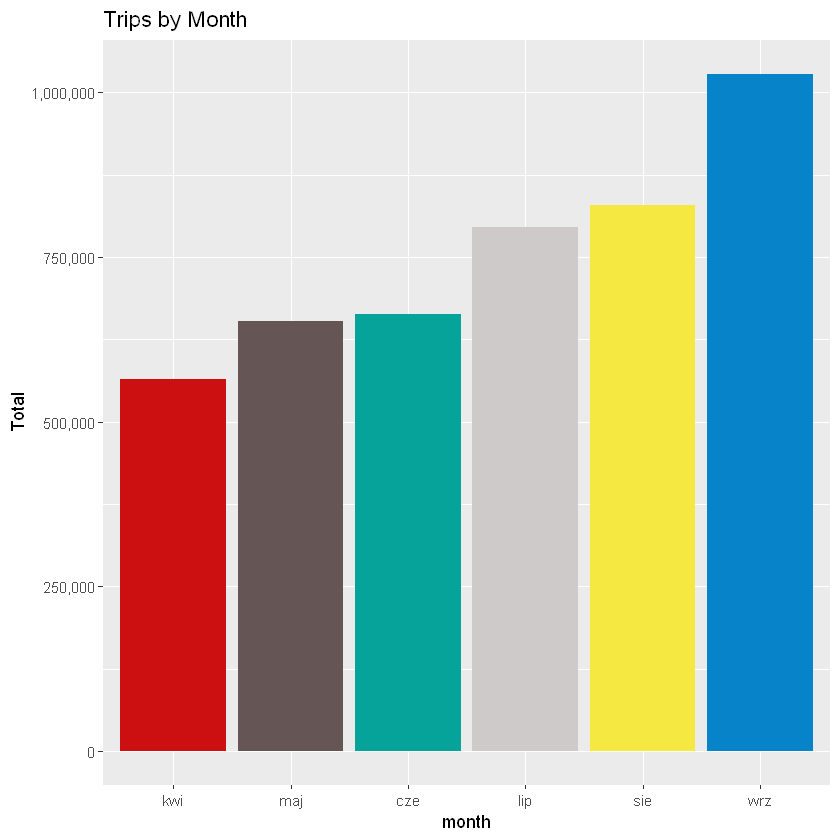

In [45]:
ggplot(month_group, aes(month, Total, fill=month)) + geom_bar(stat="identity") +
    ggtitle("Trips by Month") + theme(legend.position = "none") + scale_y_continuous(labels = comma) +
        scale_fill_manual(values = color)

In [48]:
month_weekday <- data_2014 %>%
    group_by(month, dayfoweek) %>%
        dplyr::summarize(Total = n())

`summarise()` regrouping output by 'month' (override with `.groups` argument)



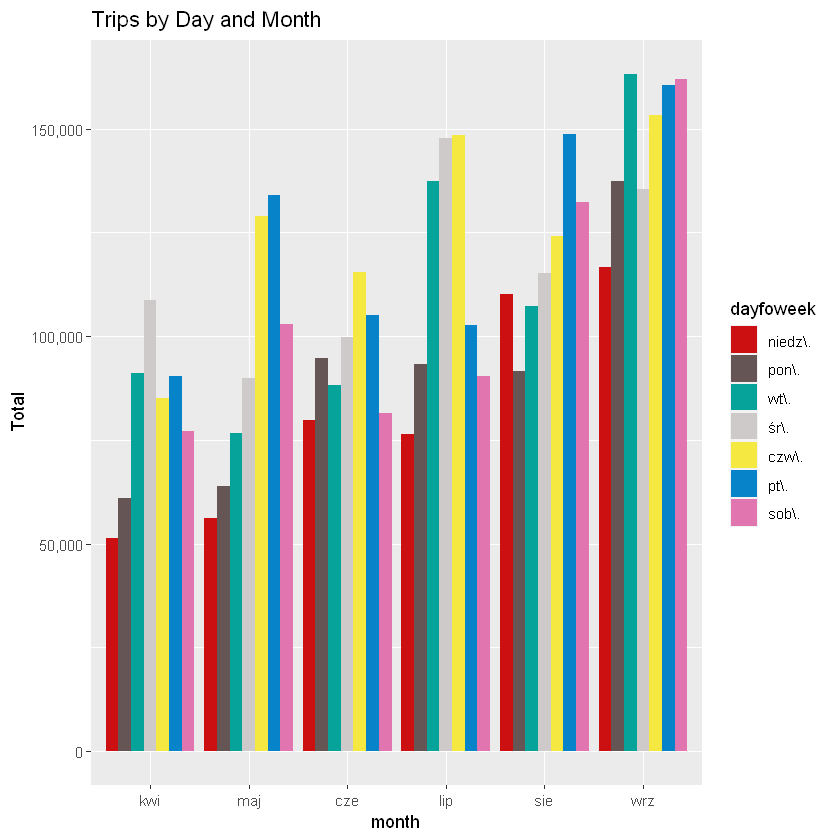

In [51]:
ggplot(month_weekday, aes(month, Total, fill = dayfoweek)) + geom_bar(stat = "identity", position = "dodge") +
    ggtitle("Trips by Day and Month") + scale_y_continuous(labels = comma) +
        scale_fill_manual(values = color)

# FINDING THE NUMBER OF TRIPS BY BASES
It's noticeable taht B02617 had the highest number of trips. Tis base had the highest number of trips in the month B02617. Thursday observed highest trips in the three bases – B02598, B02617, B02682.

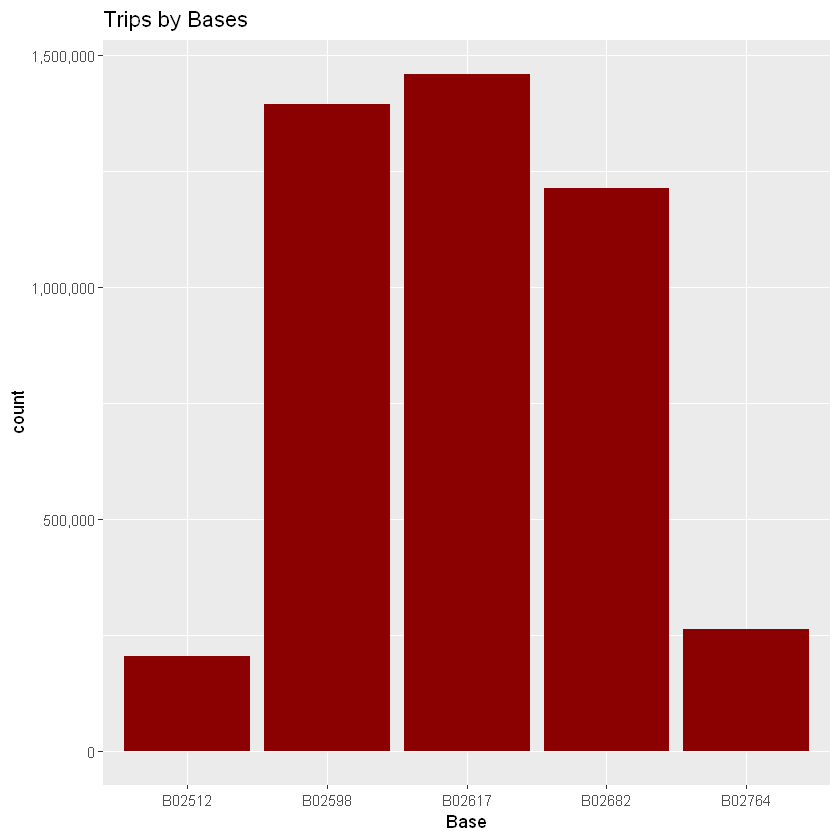

In [52]:
ggplot(data_2014, aes(Base)) + geom_bar(fill = "darkred") + scale_y_continuous(labels = comma) +
    ggtitle("Trips by Bases")

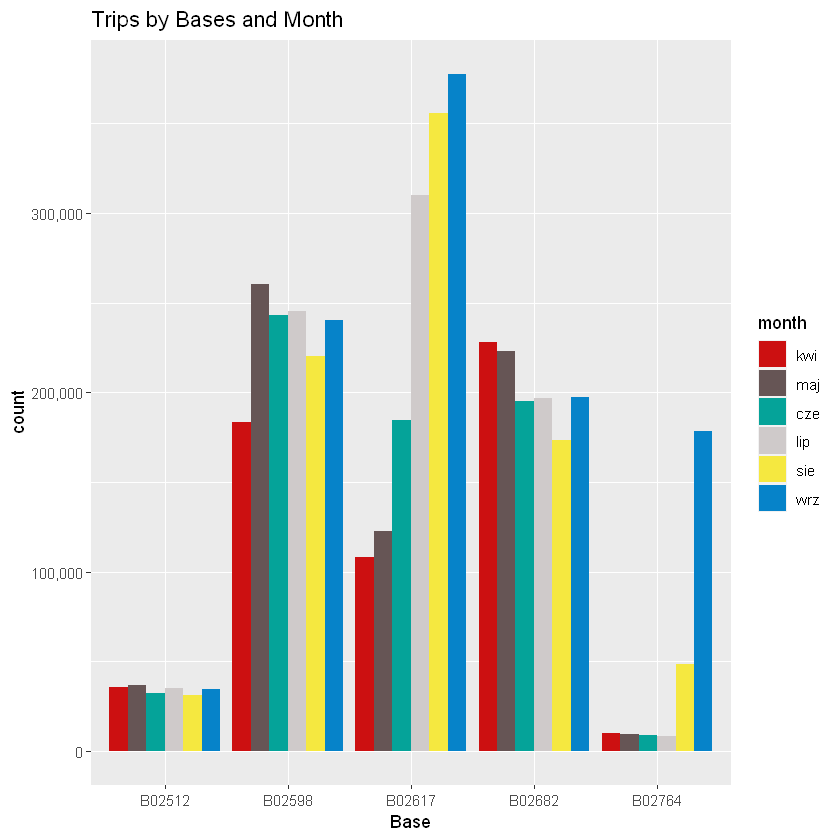

In [53]:
ggplot(data_2014, aes(Base, fill=month)) + geom_bar(position = "dodge") +
    scale_y_continuous(labels = comma) + ggtitle("Trips by Bases and Month") +
        scale_fill_manual(values = color)

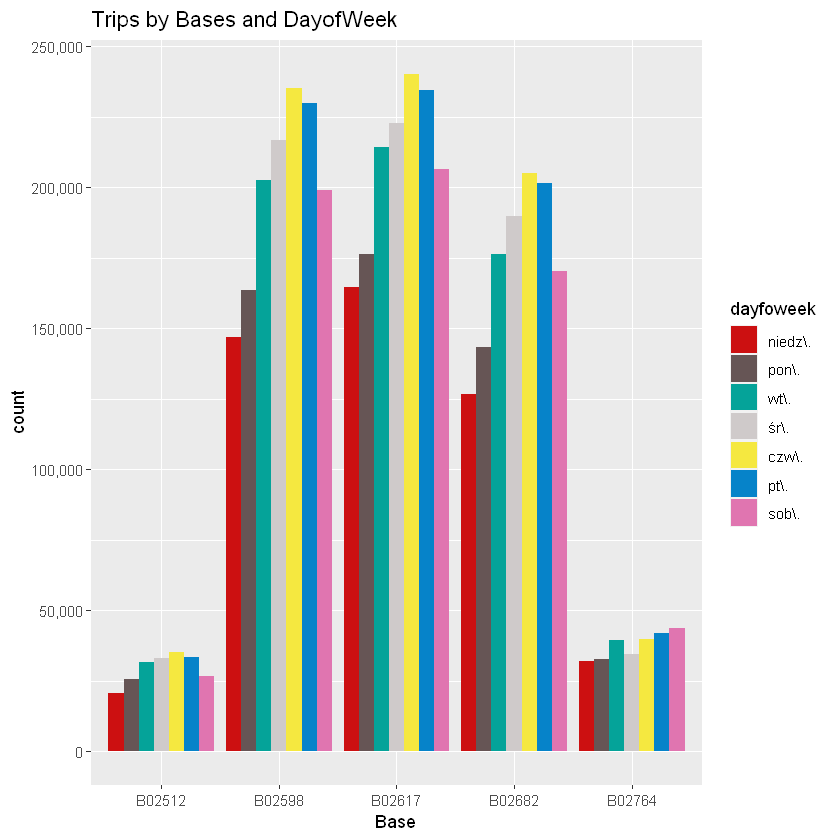

In [55]:
ggplot(data_2014, aes(Base, fill=dayfoweek)) + geom_bar(position="dodge") +
    scale_y_continuous(labels = comma) + ggtitle("Trips by Bases and DayofWeek") +
        scale_fill_manual(values = color)

# CREATING A HEATMAP VISUALIZATION OF DAY, HOUR AND MONTH

In [56]:
day_and_hour <- data_2014 %>%
    group_by(day, hour) %>%
        dplyr::summarize(Total = n())
head(day_and_hour)

`summarise()` regrouping output by 'day' (override with `.groups` argument)



day,hour,Total
<fct>,<fct>,<int>
1,0,3247
1,1,1982
1,2,1284
1,3,1331
1,4,1458
1,5,2171


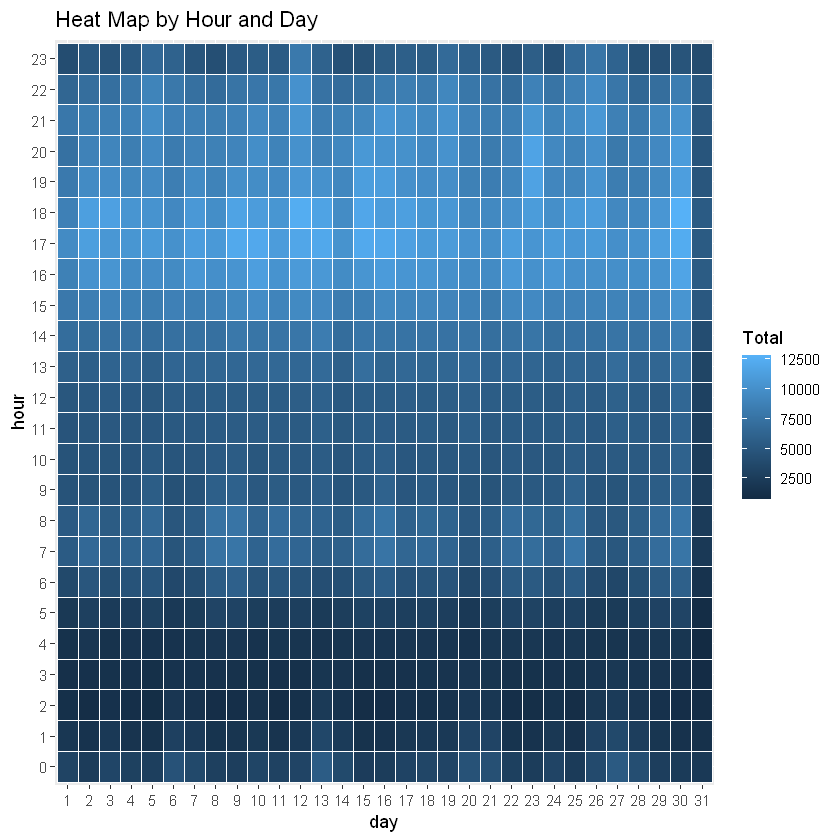

In [58]:
ggplot(day_and_hour, aes(day, hour, fill=Total)) + geom_tile(color = "white") + ggtitle("Heat Map by Hour and Day")

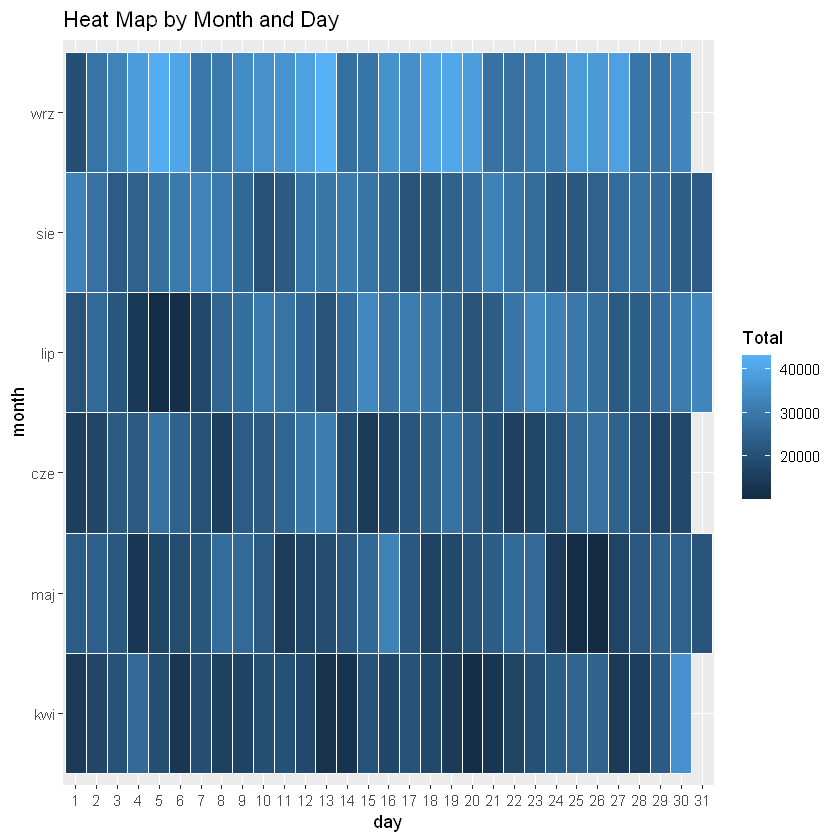

In [60]:
ggplot(day_month_group, aes(day, month, fill = Total)) + geom_tile(color = "white") + ggtitle("Heat Map by Month and Day")

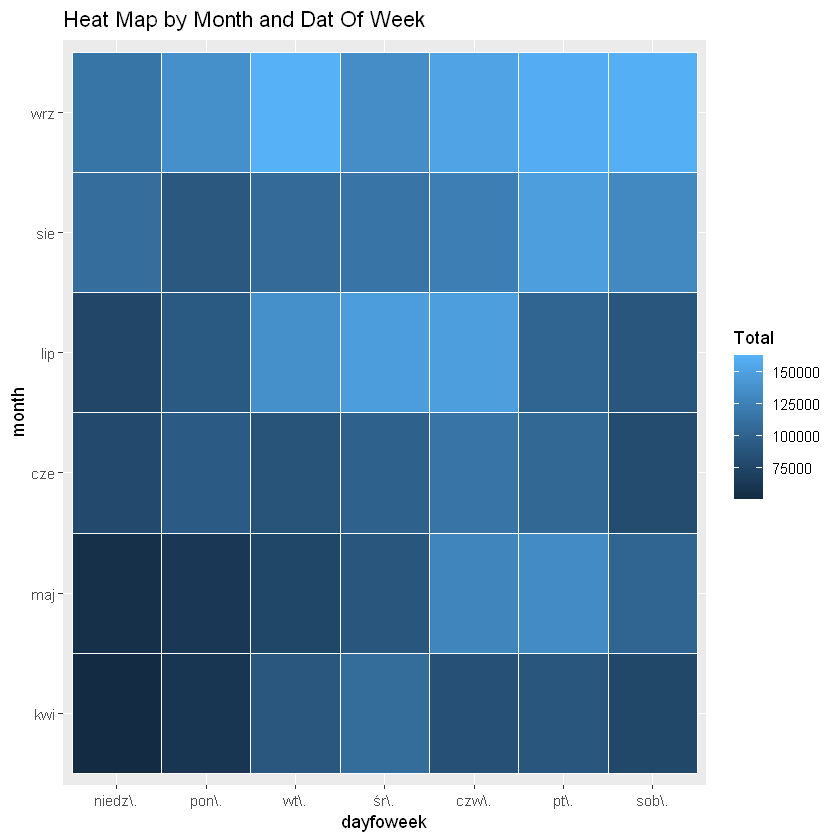

In [62]:
ggplot(month_weekday, aes(dayfoweek, month, fill = Total)) + geom_tile(color = "white") + ggtitle("Heat Map by Month and Dat Of Week")

In [63]:
month_base  <- data_2014 %>%
    group_by(Base, month) %>%
        dplyr::summarize(Total = n())

dayOfWeek_bases <- data_2014 %>%
    group_by(Base, dayfoweek) %>%
        dplyr::summarize(Total = n())

`summarise()` regrouping output by 'Base' (override with `.groups` argument)

`summarise()` regrouping output by 'Base' (override with `.groups` argument)



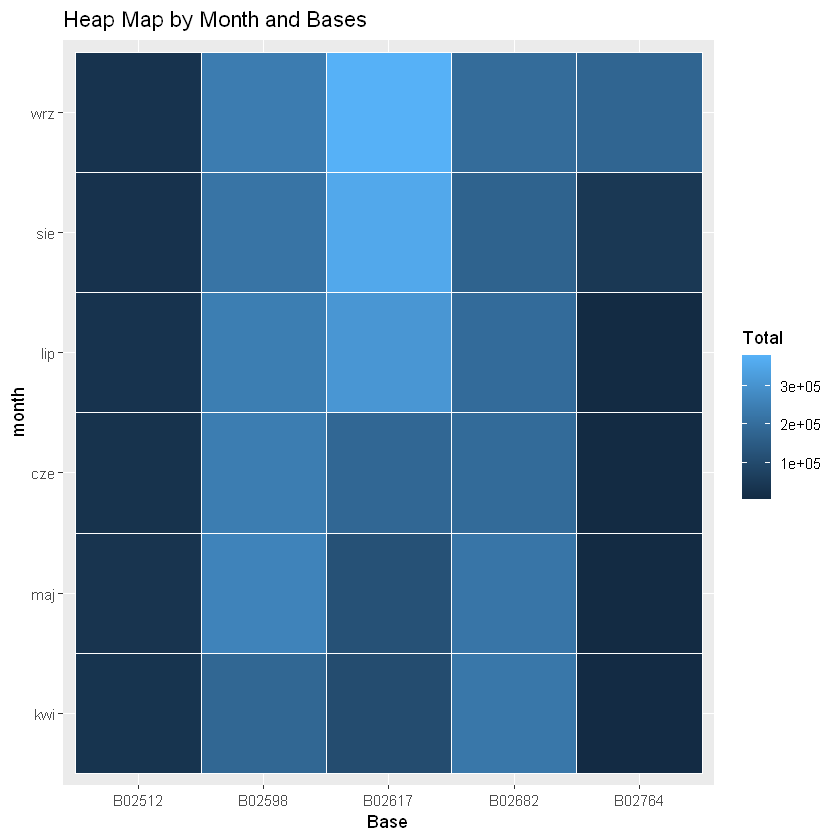

In [65]:
ggplot(month_base, aes(Base, month, fill = Total)) + geom_tile(color = "white") + 
        ggtitle("Heap Map by Month and Bases")

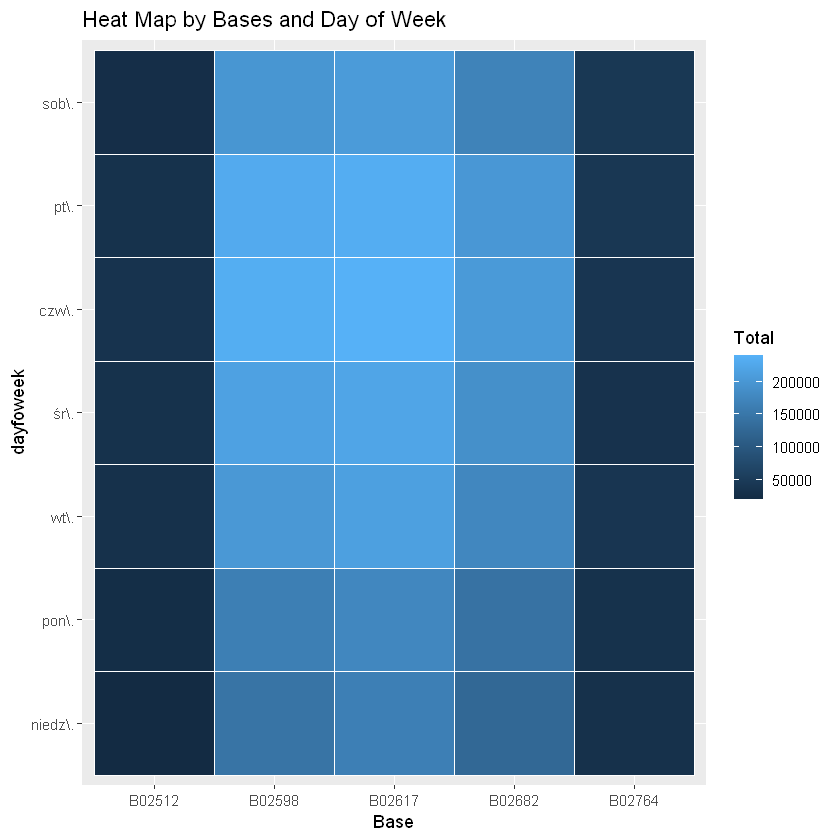

In [67]:
ggplot(dayOfWeek_bases, aes(Base, dayfoweek, fill = Total)) + geom_tile(color = "white") +
    ggtitle("Heat Map by Bases and Day of Week")

In [74]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004

# VISUALIZATION OF RIDES IN NEW YORK

Warning message:
"Removed 71701 rows containing missing values (geom_point)."


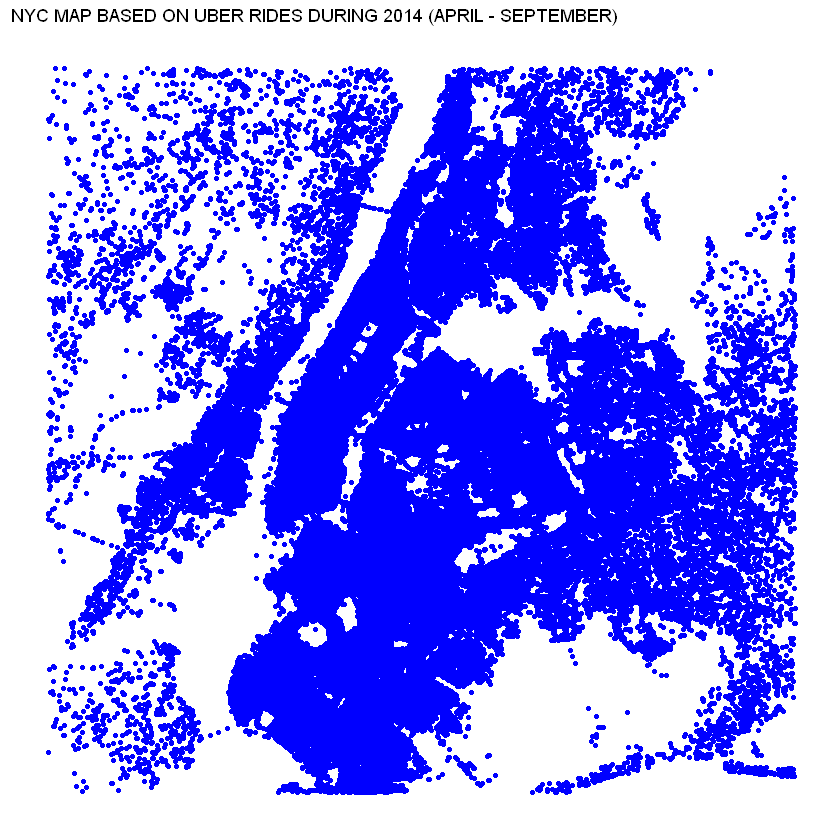

In [75]:
ggplot(data_2014, aes(x=Lon, y=Lat)) + geom_point(size=1, color="blue") +
    scale_x_continuous(limits=c(min_long, max_long)) + scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() + ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APRIL - SEPTEMBER)")

Warning message:
"Removed 71701 rows containing missing values (geom_point)."


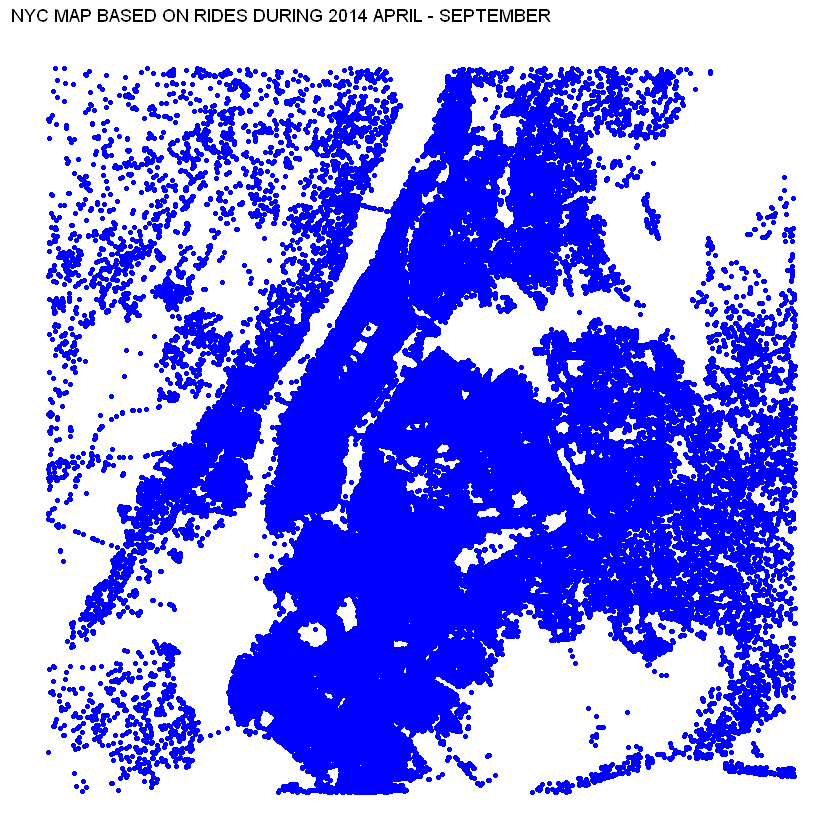

In [76]:
ggplot(data_2014, aes(x=Lon, y=Lat)) + geom_point(size=1, color = "blue") +
    scale_x_continuous(limits=c(min_long, max_long)) + scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() + ggtitle("NYC MAP BASED ON RIDES DURING 2014 APRIL - SEPTEMBER")